#### Como importar librerias

In [1]:
import pandas as pd
import networkx as nx

In [2]:
datos = pd.read_excel(r'D:\Documents\BOCC\Red.xlsx', sheet_name = 'Hoja4')

In [3]:
datos.head(3)

,ID,NOMBRE,TELEFONO,CORREO
0,1,ADAN URIBE,9999171,adan_ur@gmail.com
1,2,ADRIAN KAUFFMANN CRUZ,9999117,adrian_@outlook.com
2,3,ALEJANDRO MONTOYA,999970,alejand@outlook.es


In [4]:
datos.tail()

,ID,NOMBRE,TELEFONO,CORREO
93,68,WILFRAN DIAZ LARA,9999109,wilfran@hotmail.com
94,68,WILFRAN DIAZ LARA,9999188,wilfran@hotmail.com
95,68,WILFRAN DIAZ LARA,999941,wilfran@hotmail.com
96,69,WILSON ALEJANDRO CRUZ TELLEZ,9999181,ut_pros@yahoo.com
97,69,WILSON ALEJANDRO CRUZ TELLEZ,999923,wilson_@outlook.com


In [5]:
datos['NOMBRE']

0                       ADAN URIBE
1            ADRIAN KAUFFMANN CRUZ
2                ALEJANDRO MONTOYA
3          ALEXANDER AREVALI MUÑOZ
4          ALEXANDER AREVALI MUÑOZ
                  ...             
93               WILFRAN DIAZ LARA
94               WILFRAN DIAZ LARA
95               WILFRAN DIAZ LARA
96    WILSON ALEJANDRO CRUZ TELLEZ
97    WILSON ALEJANDRO CRUZ TELLEZ
Name: NOMBRE, Length: 98, dtype: object

In [6]:
datos.iloc[0]

ID                          1
NOMBRE             ADAN URIBE
TELEFONO              9999171
CORREO      adan_ur@gmail.com
Name: 0, dtype: object

In [7]:
datos.iloc[1:20, 1]

1                            ADRIAN KAUFFMANN CRUZ
2                                ALEJANDRO MONTOYA
3                          ALEXANDER AREVALI MUÑOZ
4                          ALEXANDER AREVALI MUÑOZ
5                     ALIRO GIOVANNY CARDENAS RICO
6                     ALIRO GIOVANNY CARDENAS RICO
7                              ANDREA PAOLA SANTOS
8                   ANDRES FELIPE HERNANDEZ SUAREZ
9                   ANDRES FELIPE HERNANDEZ SUAREZ
10                  ANDRES FELIPE HERNANDEZ SUAREZ
11                  ANDRES FELIPE HERNANDEZ SUAREZ
12                  ANDRES FELIPE HERNANDEZ SUAREZ
13    ASESORIAS EMPRESARIALES Y CONSTRUCCIONES SAS
14                                  ANGELICA PEREZ
15                      CAMILO ANDRES NIÑO MORALES
16                      CAMILO ANDRES NIÑO MORALES
17                      CAMILO ANDRES NIÑO MORALES
18                      CAMILO ANDRES NIÑO MORALES
19                           CARLOS ARTURO MERCHÁN
Name: NOMBRE, dtype: object

In [8]:
datos['ID']*2

0       2
1       4
2       6
3       8
4       8
     ... 
93    136
94    136
95    136
96    138
97    138
Name: ID, Length: 98, dtype: int64

In [9]:
datos['ID']

0      1
1      2
2      3
3      4
4      4
      ..
93    68
94    68
95    68
96    69
97    69
Name: ID, Length: 98, dtype: int64

In [10]:
datos.head()

,ID,NOMBRE,TELEFONO,CORREO
0,1,ADAN URIBE,9999171,adan_ur@gmail.com
1,2,ADRIAN KAUFFMANN CRUZ,9999117,adrian_@outlook.com
2,3,ALEJANDRO MONTOYA,999970,alejand@outlook.es
3,4,ALEXANDER AREVALI MUÑOZ,9999137,alexand@gmail.com
4,4,ALEXANDER AREVALI MUÑOZ,999983,alexand@gmail.com


In [11]:
datos['ID2'] = datos['ID']*2

In [12]:
datos.head()

,ID,NOMBRE,TELEFONO,CORREO,ID2
0,1,ADAN URIBE,9999171,adan_ur@gmail.com,2
1,2,ADRIAN KAUFFMANN CRUZ,9999117,adrian_@outlook.com,4
2,3,ALEJANDRO MONTOYA,999970,alejand@outlook.es,6
3,4,ALEXANDER AREVALI MUÑOZ,9999137,alexand@gmail.com,8
4,4,ALEXANDER AREVALI MUÑOZ,999983,alexand@gmail.com,8


In [13]:
datos.columns

Index(['ID', 'NOMBRE', 'TELEFONO', 'CORREO', 'ID2'], dtype='object')

In [14]:
datos.index

RangeIndex(start=0, stop=98, step=1)

In [15]:
datos.to_excel(r'D:\Documents\BOCC\Red_2.xlsx', index = False)

## Grafos

In [16]:
G = nx.Graph()

In [17]:
DG = nx.DiGraph()

In [18]:
G

In [19]:
G.add_node(1)

In [20]:
G.nodes()

NodeView((1,))

In [21]:
G.add_nodes_from([2,3,4,'Hola',6])

In [22]:
G.nodes

NodeView((1, 2, 3, 4, 'Hola', 6))

In [23]:
G.add_edge(1,2)

In [24]:
G.edges

EdgeView([(1, 2)])

In [25]:
G.add_edges_from([('Hola', 2), (4,5), (6,1), (3,4), ('Hola', 'Adios')])

In [26]:
G.nodes()

NodeView((1, 2, 3, 4, 'Hola', 6, 5, 'Adios'))

In [27]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 1, 4: 2, 'Hola': 2, 6: 1, 5: 1, 'Adios': 1})

In [28]:
G.degree()['Adios']

1

In [29]:
nx.is_connected(G)

False

In [30]:
nx.connected_components(G)

<generator object connected_components at 0x000002842F83DD90>

In [31]:
componentes = list(nx.connected_components(G))

In [32]:
H = G.subgraph(componentes[0])

In [33]:
H.nodes

NodeView((1, 2, 'Hola', 6, 'Adios'))

In [34]:
nx.is_connected(H)

True

In [35]:
for c in componentes:
    print(c)
    print(len(c))

{1, 2, 6, 'Adios', 'Hola'}
5
{3, 4, 5}
3


In [36]:
dict(nx.all_pairs_shortest_path(H))

{1: {1: [1],
  2: [1, 2],
  6: [1, 6],
  'Hola': [1, 2, 'Hola'],
  'Adios': [1, 2, 'Hola', 'Adios']},
 2: {2: [2],
  1: [2, 1],
  'Hola': [2, 'Hola'],
  6: [2, 1, 6],
  'Adios': [2, 'Hola', 'Adios']},
 'Hola': {'Hola': ['Hola'],
  2: ['Hola', 2],
  'Adios': ['Hola', 'Adios'],
  1: ['Hola', 2, 1],
  6: ['Hola', 2, 1, 6]},
 6: {6: [6],
  1: [6, 1],
  2: [6, 1, 2],
  'Hola': [6, 1, 2, 'Hola'],
  'Adios': [6, 1, 2, 'Hola', 'Adios']},
 'Adios': {'Adios': ['Adios'],
  'Hola': ['Adios', 'Hola'],
  2: ['Adios', 'Hola', 2],
  1: ['Adios', 'Hola', 2, 1],
  6: ['Adios', 'Hola', 2, 1, 6]}}

In [37]:
caminos =dict(nx.all_pairs_shortest_path(G))

In [38]:
for nodo1 in caminos.keys():
    for nodo2 in caminos[nodo1].keys():
        print(nodo1, nodo2, len(caminos[nodo1][nodo2])-1)

1 1 0
1 2 1
1 6 1
1 Hola 2
1 Adios 3
2 2 0
2 1 1
2 Hola 1
2 6 2
2 Adios 2
3 3 0
3 4 1
3 5 2
4 4 0
4 5 1
4 3 1
Hola Hola 0
Hola 2 1
Hola Adios 1
Hola 1 2
Hola 6 3
6 6 0
6 1 1
6 2 2
6 Hola 3
6 Adios 4
5 5 0
5 4 1
5 3 2
Adios Adios 0
Adios Hola 1
Adios 2 2
Adios 1 3
Adios 6 4


#### Centralidades

In [39]:
nx.closeness_centrality(H)

{1: 0.5714285714285714,
 2: 0.6666666666666666,
 'Hola': 0.5714285714285714,
 6: 0.4,
 'Adios': 0.4}

In [40]:
nx.betweenness_centrality(H)

{1: 0.5, 2: 0.6666666666666666, 'Hola': 0.5, 6: 0.0, 'Adios': 0.0}

In [41]:
nx.eigenvector_centrality(H)

{1: 0.49999999508235293,
 2: 0.5773493802714443,
 'Hola': 0.49999999508235293,
 6: 0.2886760320285294,
 'Adios': 0.2886760320285294}

In [42]:
lista1 = [1,2,3,4,5]
lista2 = [6,7,8,9]

list(zip(lista1, lista2))

[(1, 6), (2, 7), (3, 8), (4, 9)]

In [43]:
list(zip(datos['ID'], datos['NOMBRE']))

[(1, 'ADAN URIBE'),
 (2, 'ADRIAN KAUFFMANN CRUZ'),
 (3, 'ALEJANDRO MONTOYA'),
 (4, 'ALEXANDER AREVALI MUÑOZ'),
 (4, 'ALEXANDER AREVALI MUÑOZ'),
 (5, 'ALIRO GIOVANNY CARDENAS RICO'),
 (5, 'ALIRO GIOVANNY CARDENAS RICO'),
 (7, 'ANDREA PAOLA SANTOS'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ASESORIAS EMPRESARIALES Y CONSTRUCCIONES SAS'),
 (9, 'ANGELICA PEREZ'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (13, 'CARLOS ARTURO MERCHÁN'),
 (14, 'CARLOS CERVANTES'),
 (15, 'CARLOS EDUARDO RIVEROS CALDERON'),
 (17, 'CONSORCIO ASPE'),
 (19, 'CONSORCIO S&S COFAC 029'),
 (20, 'CONSORCIO S&S TOLEMAIDA'),
 (22, 'CRISTIAN GERARDO PEREZ VEGA'),
 (22, 'CRISTIAN GERARDO PEREZ VEGA'),
 (23, 'DAIRO RODRIGUEZ BONILLA'),
 (24, 'DANIEL JOSE NI

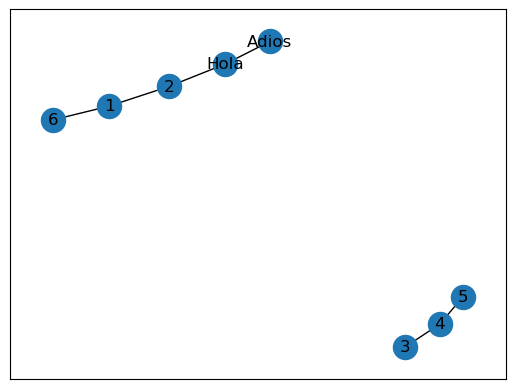

In [44]:
nx.draw_networkx(G)

In [45]:
aristas1 = list(zip(datos['ID'], datos['NOMBRE']))
aristas1

[(1, 'ADAN URIBE'),
 (2, 'ADRIAN KAUFFMANN CRUZ'),
 (3, 'ALEJANDRO MONTOYA'),
 (4, 'ALEXANDER AREVALI MUÑOZ'),
 (4, 'ALEXANDER AREVALI MUÑOZ'),
 (5, 'ALIRO GIOVANNY CARDENAS RICO'),
 (5, 'ALIRO GIOVANNY CARDENAS RICO'),
 (7, 'ANDREA PAOLA SANTOS'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ANDRES FELIPE HERNANDEZ SUAREZ'),
 (8, 'ASESORIAS EMPRESARIALES Y CONSTRUCCIONES SAS'),
 (9, 'ANGELICA PEREZ'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (12, 'CAMILO ANDRES NIÑO MORALES'),
 (13, 'CARLOS ARTURO MERCHÁN'),
 (14, 'CARLOS CERVANTES'),
 (15, 'CARLOS EDUARDO RIVEROS CALDERON'),
 (17, 'CONSORCIO ASPE'),
 (19, 'CONSORCIO S&S COFAC 029'),
 (20, 'CONSORCIO S&S TOLEMAIDA'),
 (22, 'CRISTIAN GERARDO PEREZ VEGA'),
 (22, 'CRISTIAN GERARDO PEREZ VEGA'),
 (23, 'DAIRO RODRIGUEZ BONILLA'),
 (24, 'DANIEL JOSE NI

In [46]:
G1 = nx.Graph()

In [47]:
G1.add_edges_from(aristas1)

In [48]:
aristas2 = list(zip(datos['TELEFONO'], datos['NOMBRE']))
aristas3 = list(zip(datos['CORREO'], datos['NOMBRE']))

In [49]:
G1.add_edges_from(aristas2)
G1.add_edges_from(aristas3)

In [50]:
G1.number_of_nodes()

277

In [51]:
277*276/2

38226.0

In [52]:
G1.number_of_edges()

250

In [53]:
sorted(nx.betweenness_centrality(G1).items(), key = lambda x: x[1])

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (7, 0.0),
 (9, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (17, 0.0),
 (19, 0.0),
 (20, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (69, 0.0),
 (9999171, 0.0),
 (999970, 0.0),
 (9999137, 0.0),
 (999983, 0.0),
 (999989, 0.0),
 (9999204, 0.0),
 (9999135, 0.0),
 (999940, 0.0),
 (9999130, 0.0),
 (9999131, 0.0),
 (99992, 0.0),
 (9999149, 0.0),
 (999987, 0.0),
 (999976, 0.0),
 (999943, 0.0),
 (9999110, 0.0),
 (9999203, 0.0),
 (999961, 0.0),
 (9999126, 0.0),
 (9999156, 0.0),
 (999968, 0.0),
 (999932, 0.0),
 (9999108, 0.0),
 (9999174, 0.0),

In [57]:
list(nx.dfs_edges(G1, 68))

[(68, 'AMT FÜR UMWELTSCHUTZ  STUTTGART'),
 ('AMT FÜR UMWELTSCHUTZ  STUTTGART', 9999157),
 ('AMT FÜR UMWELTSCHUTZ  STUTTGART', 'amt_für@outlook.com'),
 (68, 'CAMALEON MULTIMEDIA SAS'),
 ('CAMALEON MULTIMEDIA SAS', 9999210),
 ('CAMALEON MULTIMEDIA SAS', 'camaleo@gmail.com'),
 (68, 'CONSORCIO OBP RES'),
 ('CONSORCIO OBP RES', 999962),
 ('CONSORCIO OBP RES', 'consorc@hotmail.com'),
 ('consorc@hotmail.com', 'CONSORCIO S&S COFAC 029'),
 ('CONSORCIO S&S COFAC 029', 19),
 ('CONSORCIO S&S COFAC 029', 999943),
 (68, 'WILFRAN DIAZ LARA'),
 ('WILFRAN DIAZ LARA', 9999109),
 ('WILFRAN DIAZ LARA', 9999188),
 (9999188, 'INDUSTRIAS RIVMA SAS'),
 ('INDUSTRIAS RIVMA SAS', 33),
 ('INDUSTRIAS RIVMA SAS', 'industr@outlook.com'),
 (9999188, 'ETRAINING S.A.S.'),
 ('ETRAINING S.A.S.', 54),
 (54, 'MARIO GERMAN GARCÍA GARCÍA'),
 ('MARIO GERMAN GARCÍA GARCÍA', 9999158),
 ('MARIO GERMAN GARCÍA GARCÍA', 'mario_g@outlook.com'),
 (54, 'MARITZA PINZÓN CAMACHO'),
 ('MARITZA PINZÓN CAMACHO', 999911),
 (999911, 'MARIA JO

In [61]:
raiz = 68
aristas = nx.bfs_edges(G1, raiz)
lista = [raiz] + [val[1] for val in aristas]
lista

[68,
 'AMT FÜR UMWELTSCHUTZ  STUTTGART',
 'CAMALEON MULTIMEDIA SAS',
 'CONSORCIO OBP RES',
 'WILFRAN DIAZ LARA',
 9999157,
 'amt_für@outlook.com',
 9999210,
 'camaleo@gmail.com',
 999962,
 'consorc@hotmail.com',
 9999109,
 9999188,
 999941,
 'wilfran@hotmail.com',
 'CONSORCIO S&S COFAC 029',
 'INDUSTRIAS RIVMA SAS',
 'ETRAINING S.A.S.',
 'PGREFORESTACION',
 'UT PROSERVIUS',
 'PEPITO TORRES',
 'UNIÓN TEMPORAL ACOMPAÑAMIENTO PEDAGÓGICO 2018',
 'CONSORCIO S&S TOLEMAIDA',
 'CONSORCIO SS DIGSA FAC',
 19,
 999943,
 33,
 'industr@outlook.com',
 54,
 'etraini@outlook.com',
 59,
 'pgrefor@yahoo.com',
 8,
 'ut_pros@yahoo.com',
 58,
 'pepito_@gmail.com',
 64,
 'unión_t@outlook.es',
 20,
 9999110,
 37,
 999965,
 'MARIO GERMAN GARCÍA GARCÍA',
 'MARITZA PINZÓN CAMACHO',
 'UNION TEMPORAL EISPRINGE',
 'ANDRES FELIPE HERNANDEZ SUAREZ',
 'ASESORIAS EMPRESARIALES Y CONSTRUCCIONES SAS',
 'WILSON ALEJANDRO CRUZ TELLEZ',
 'CONSORCIO ASO',
 'JESUS ORLANDO VIVAS NOGUERA',
 'MARTIN HERNANDO BASTIDAS BURBANO',


In [62]:
raiz = 68
aristas = nx.dfs_edges(G1, raiz)
lista = [raiz] + [val[1] for val in aristas]
lista

[68,
 'AMT FÜR UMWELTSCHUTZ  STUTTGART',
 9999157,
 'amt_für@outlook.com',
 'CAMALEON MULTIMEDIA SAS',
 9999210,
 'camaleo@gmail.com',
 'CONSORCIO OBP RES',
 999962,
 'consorc@hotmail.com',
 'CONSORCIO S&S COFAC 029',
 19,
 999943,
 'WILFRAN DIAZ LARA',
 9999109,
 9999188,
 'INDUSTRIAS RIVMA SAS',
 33,
 'industr@outlook.com',
 'ETRAINING S.A.S.',
 54,
 'MARIO GERMAN GARCÍA GARCÍA',
 9999158,
 'mario_g@outlook.com',
 'MARITZA PINZÓN CAMACHO',
 999911,
 'MARIA JOSE TARAZONA GELVEZ',
 49,
 'maria_j@gmail.com',
 9999132,
 999924,
 'maritza@outlook.com',
 'luis_fe@outlook.com',
 'ASESORIAS EMPRESARIALES Y CONSTRUCCIONES SAS',
 8,
 'ANDRES FELIPE HERNANDEZ SUAREZ',
 9999129,
 9999135,
 999947,
 'FABIOLA AHUMADA JARAMILLO',
 29,
 'fabiola@outlook.es',
 'SANTIAGO GUZMAN',
 62,
 'santiag@gmail.com',
 'andres_@gmail.com',
 'andres_@outlook.com',
 'andres_@outlook.es',
 'andres_@hotmail.com',
 'UT PROSERVIUS',
 'ut_pros@yahoo.com',
 'WILSON ALEJANDRO CRUZ TELLEZ',
 69,
 9999181,
 999923,
 'MARIA 